# Analyzing Kargin Haghordum Data

## **Introduction**

In this project, you get to work with the data of the Youtube videos of the popular TV show “Kargin Haghordum”, containing information about a few hundred videos. You will fetch their views from Youtube, use clustering algorithms to group them and try to predict their views if possible.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Dataset**

We'll use a dataset collected by volunteers, containing detailed information about each sketch. It includes attributes like the main characters and actors involved, and languages spoken.

In [ ]:
raw_data = pd.read_csv("kargin.csv")
# raw_data.info()

## **Deliverables**

1. Data Preprocessing: Clean, preprocess, and handle missing values, outliers, and inconsistencies. Convert data types and handle categorical variables.
2. Exploratory Data Analysis (EDA): Identify trends, patterns, and correlations through visualizations and statistical analysis.
3. Feature Engineering: Derive new features to enhance predictive power.
4. Use K-Means and other clustering algorithms to group the sketches into clusters.
5. Data Fetching: Use [this library](https://pytube.io/en/latest/api.html#youtube-object) to extract view counts for each video (using URL), and try to predict them using the other features.
6. Model Building: Explore algorithms like linear regression, decision trees, or random forests for predicting views. Train, tune hyperparameters, and select the most suitable model.
7. Model Evaluation: Evaluate models using metrics like MSE, MAPE, etc. Compare and choose the best-performing model.
8. View Predictions: Make predictions using unseen data and assess performance.

---

### 1. Data Preporocessing

In the given data we have below rows:

`title | link | phrases | text | main_actors | n_main_actors | characters | place | day_night | languages`


 From these rows as features we pick:
 - main_actors
 - languages
 - day_night
 - place


#### 1.1 As a first step we clear rows, which include null values for the features
(We also clear rows having null `link` as well, because we will not be able to determine view count for them )

In [ ]:
raw_data

,title,link,phrases,text,main_actors,n_main_actors,characters,place,day_night,languages
0,Kargin Haghordum sketch 401 (Hayko Mko),https://www.youtube.com/watch?v=2311QdBFp4o&li...,NaN,Աայ; Գագ ջան այ տենց դանդաղ; Գագ ջան մի քիչ դա...,"Մկո, ոստիկան",1,Գագ,Տուն,լուսավոր,հայերեն
1,Kargin Haghordum sketch 402 (Hayko Mko),https://www.youtube.com/watch?v=4SBSBGc4dcc&li...,սպասի ազիզ ջան հլը մի հաշվի էս էլի ես եմ,Աաաախ; ուրեմն նաի ազիզ ջան հեսա էդ պատուհանից ...,"Մկո, փոքր երեխա",2,Ոչ մի,Տուն,լուսավոր,հայերեն
2,Kargin Haghordum sketch 403 (Hayko Mko),https://www.youtube.com/watch?v=pi2au8rx0XQ&li...,NaN,ահա վերջ գնաաց; էէհ; արա ես ինչ անձրև սկսեց սա...,"Մկո, Հայկո, Մկո",3,Ոչ մի,Բնության գիրկ,լուսավոր հետո մութ,հայերեն
3,Kargin Haghordum sketch 419 (Hayko Mko),https://www.youtube.com/watch?v=YxcS2fTHrII&li...,Թու արա էլի մտքերով ընգա,Չէ Վարսիկ ջան էսօր չգնացի ասի մնամ տանը մի քիչ...,"Հայկո, Մկո",2,Վաչիկ,Տուն,լուսավոր,հայերեն
4,Kargin Haghordum sketch 421 (Hayko Mko),https://www.youtube.com/watch?v=DvZ-qwJ9C0Y&li...,Ընչի հըմար,"Հիմա ի՞նչ, միտինգ են անու՞մ; Ուզածները ի՞նչ ա;...","Հայկո, Մկո",2,Ոչ մի,Ավտոմեքենա,լուսավոր,հայերեն
...,...,...,...,...,...,...,...,...,...,...
690,Kargin Haghordum sketch 193 (Hayko Mko),https://www.youtube.com/watch?v=md3Fg6xgJfo&li...,֊Հնարավոր ա։ Բիսկբիթ ֆաս։Բարի ճանապարհ ախպեր։,"֊Ողջու՜յն եղբայր, դուք այստեղ եք բնակվում։ ֊Ող...","Հայկո, Մկո",2,ոչ մի,Գյուղ,լուսավոր,հայերեն
691,Kargin Haghordum sketch 196 (Hayko Mko),https://www.youtube.com/watch?v=kolSov5YzHw&li...,"Պրոֆեսիոնալ բաքսյորա, Մինչև 10֊ը հաշվում ես, 8...","֊Բժիշկ ջան, խնդրում եմ էլի, մենակ քաղմաս չզանգ...","Հայկո, Մկո, Աշոտ",3,ոչ մի,Հիվանդանոց,լուսավոր,հայերեն
692,Kargin Haghordum sketch 197 (Hayko Mko),https://www.youtube.com/watch?v=ipVYU1B3mTs&li...,"֊Չես ասել, Բայց հաստատ մտածել ես։","֊Խոզը դու ես։ ֊Տղա ջան, հալովդ մնա հա։ Ես քեզ ...","Հայկո, Մկո",2,ոչ մի,Բնության գիրկ,լուսավոր,հայերեն
693,Kargin Haghordum sketch 198 (Hayko Mko),https://www.youtube.com/watch?v=HHQFrPhkFhE&li...,"֊Քեզ ո՞վ էր խնդրում էդ անեիր, այ հիմար","֊Ինչ եք ցանկանում։ ֊Աղջիկ ջան ինձ սև սուրճ, Սա...","Հայկո, Մկո, Աշոտ, Հասմիկ",4,"Սամվել, Պ Ղազարյան",Սրճարան,լուսավոր,հայերեն


In [ ]:
# Removing null rows for the features
features = ["main_actors", "languages", "day_night", "place"]

raw_data = raw_data[~raw_data["link"].isnull()]
raw_data = raw_data.dropna(subset=features)

In [ ]:
def calculate_encoding(vals, coef=1):

  def calc(x):
    res = coef
    for i, val in enumerate(vals):
      if val in x.lower():
        res *= coef ** (len(vals) - i+1)
    return res

  return calc


In [ ]:
def preprocess_data(df):

  res = pd.DataFrame({'link': df['link']})

  main_actors = ['հայկո', 'մկո', 'հասմիկ', 'անդո', 'ռաֆո', 'աշոտ', 'արմինե']
  res['actors'] = df['main_actors'].apply(calculate_encoding(main_actors, coef=0.9))

  languages = ['հայերեն', 'ռուսերեն', 'գերմաներեն', 'անգլերեն']
  res['languages'] = df['languages'].apply(calculate_encoding(languages, coef=0.8))

  daytimes = ['լուսավոր', 'մութ']
  res['daytimes'] = df['day_night'].apply(calculate_encoding(daytimes, coef=0.4))

  places = [ 'տուն', 'դուրս', 'հիվանդանոց', 'գրասենյակ', 'բնության գիրկ',
          'ավտոմեքենա', 'ննջարան', 'դպրոց', 'խանութ', 'շենք', 'գյուղ',
          'ռեստորան', 'գինետուն', 'բանակ', 'սրճարան', 'ավտոբուս',
          'լսարան', 'եկեղեցի', 'բանտ', 'ոստիկանություն', 'հյուրանոց',
          'գնացք', 'արհեստանոց', 'խոհանոց', 'բանկ', 'ազգային ժողով',
          'թանգարան', 'ատամնաբուժարան', 'անապատ']
  res['places'] = df['place'].apply(calculate_encoding(places, coef=0.2))

  return res


In [ ]:
%pip install pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.3 MB/s eta 0:00:00


In [ ]:
import pytube

In [ ]:
SCALE = 100_000

In [ ]:
def add_views(df):
  views = df['link'].apply(lambda x: pytube.YouTube(x).views)
  res = df.drop(['link'], axis=1)
  res['views'] = views.apply(lambda x: x / SCALE)
  return res


In [ ]:
new_data = preprocess_data(raw_data)
# new_data = add_views(new_data)

new_data


,link,actors,languages,daytimes,places
0,https://www.youtube.com/watch?v=2311QdBFp4o&li...,0.430467,0.262144,0.025600,2.147484e-22
1,https://www.youtube.com/watch?v=4SBSBGc4dcc&li...,0.430467,0.262144,0.025600,2.147484e-22
2,https://www.youtube.com/watch?v=pi2au8rx0XQ&li...,0.185302,0.262144,0.004096,1.342177e-19
3,https://www.youtube.com/watch?v=YxcS2fTHrII&li...,0.185302,0.262144,0.025600,2.147484e-22
4,https://www.youtube.com/watch?v=DvZ-qwJ9C0Y&li...,0.185302,0.262144,0.025600,6.710886e-19
...,...,...,...,...,...
690,https://www.youtube.com/watch?v=md3Fg6xgJfo&li...,0.185302,0.262144,0.025600,2.097152e-15
691,https://www.youtube.com/watch?v=kolSov5YzHw&li...,0.135085,0.262144,0.025600,5.368709e-21
692,https://www.youtube.com/watch?v=ipVYU1B3mTs&li...,0.185302,0.262144,0.025600,1.342177e-19
693,https://www.youtube.com/watch?v=HHQFrPhkFhE&li...,0.071790,0.262144,0.025600,1.310720e-12


In [ ]:
validate_raw_data = pd.DataFrame(
    [['https://www.youtube.com/watch?v=5RRWJBCoZ-E', 'Հայկո, Մկո', 'հայերեն', 'մութ', 'տուն, ննջարան', None]],
    columns=[ 'link', 'main_actors', 'languages', 'day_night', 'place', 'phrases'],
)
validate_data = preprocess_data(validate_raw_data)
validate_data = add_views(validate_data)

expected_prediction = validate_data['views'][0] # 649_922
validate_data = validate_data.drop(['views'], axis=1)
expected_prediction, validate_data

(6.49934,
      actors  languages  daytimes        places
 0  0.185302   0.262144     0.064  3.602880e-39)

In [ ]:
# !!!!! RUN ONLY ONCE !!!!!
# Dev mode
# Running this once to prevent waiting for a long response
views = new_data['link'].apply(lambda x: pytube.YouTube(x).views)

In [ ]:
# Dev mode
# This can be run many times
new_data['views'] = views.apply(lambda x: x / SCALE)
data = new_data.drop(['link'], axis=1)
data

,actors,languages,daytimes,places,views
0,0.430467,0.262144,0.025600,2.147484e-22,6.79584
1,0.430467,0.262144,0.025600,2.147484e-22,10.96723
2,0.185302,0.262144,0.004096,1.342177e-19,12.27764
3,0.185302,0.262144,0.025600,2.147484e-22,4.06956
4,0.185302,0.262144,0.025600,6.710886e-19,10.38733
...,...,...,...,...,...
690,0.185302,0.262144,0.025600,2.097152e-15,1.65123
691,0.135085,0.262144,0.025600,5.368709e-21,5.77389
692,0.185302,0.262144,0.025600,1.342177e-19,1.17071
693,0.071790,0.262144,0.025600,1.310720e-12,2.42815


Text(0, 0.5, 'Views')

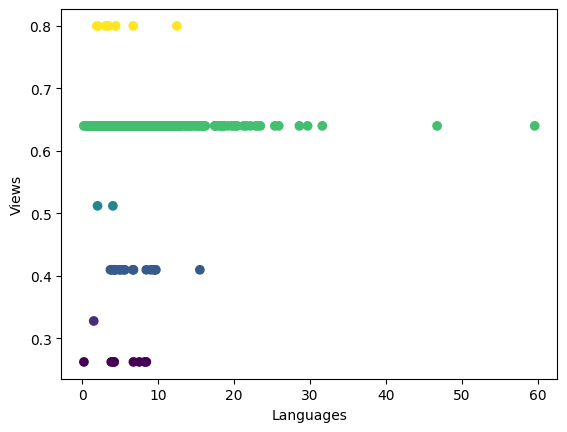

In [ ]:
# @title Actors vs Languages

import matplotlib.pyplot as plt
_ = plt.scatter(data['views'], data['languages'], c=data['languages'])
plt.xlabel('Languages')
plt.ylabel('Views')

Text(0, 0.5, 'Views')

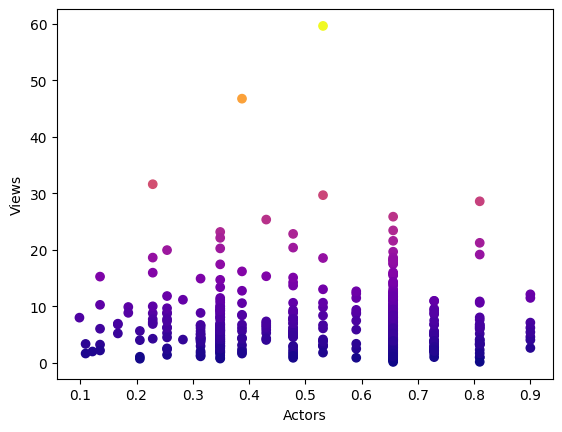

In [ ]:
# @title Views vs Actors

import matplotlib.pyplot as plt
plt.scatter(data['actors'], data['views'], c=data['views'], cmap='plasma')
plt.xlabel('Actors')
plt.ylabel('Views')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['views']),
                                                    data['views'], test_size=0.1,
                                                    random_state=0)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

pred = model.predict(validate_data)[0] # 649_922
int(pred * SCALE)

Mean Squared Error: 23.884705100643924
Mean Absolute Error: 3.541855421037004


622974